This notebook is aiming at generating confusion matrices for each class under MULTI_LABEL mode in Comprehend serivces

Prerequisite: 

1) Confusion matrix output from Comprehend service under multi_label mode

Output:

Confusion matrix analysis displayed in this notebook 

In [1]:
# Import required libraries
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import confusion matrix output from Comprehend
cf_file = 'confusion_matrix_subgroup.json'

In [3]:
# Open the confusion matrix file
with open(cf_file, encoding = 'utf-8') as lines:
    for line in lines:
        output_line = json.loads(line)

In [4]:
# Define plot function
def print_confusion_matrix(confusion_matrix, axes, class_label, class_names, fontsize=14):
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
    
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt='d', cbar=False, ax=axes)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    axes.set_xlabel('Predicted Label')
    axes.set_ylabel('True Label')
    axes.set_title(class_label)

In [5]:
# Define performance matrics function
def print_perf_matrics(confusion_matrix, class_label):
    TN = confusion_matrix[0][0]
    TP = confusion_matrix[1][1]
    FP = confusion_matrix[0][1]
    FN = confusion_matrix[1][0]
    
    accuracy_score = (TN + TP) / (TN + TP + FN + FP)
    precision_score = (TP) / (TP + FP)
    recall_score = (TP) / (TP + FN)
    f1_score = 2*(precision_score * recall_score)/(precision_score + recall_score)
    
    df_record = pd.DataFrame([{"Class" : class_label, "Accuracy": accuracy_score, "Precision": precision_score,
                              "Recall": recall_score, "F1":f1_score}])
    
    return df_record

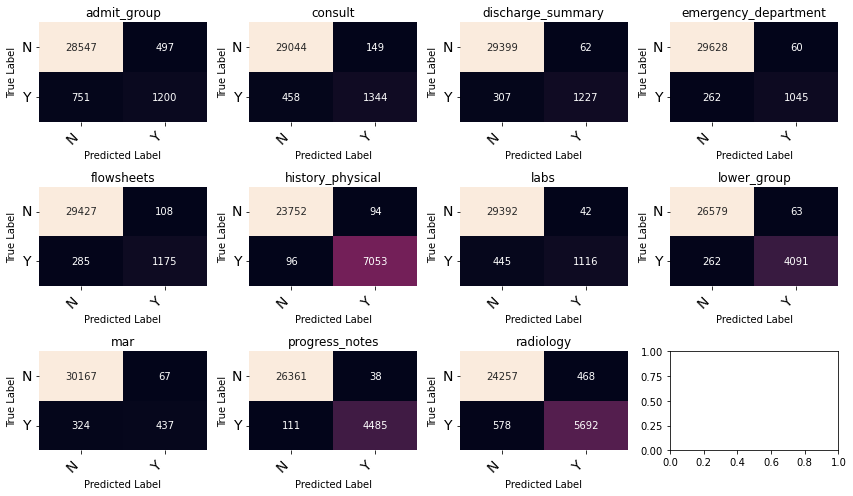

In [6]:
# Plot confusion matrix for each class
fig, ax = plt.subplots((len(output_line['labels']) // 4) + 1, 4, figsize = (12, 7))

for axes, cfs_matrix, label in zip(ax.flatten(), output_line['confusion_matrix'], output_line['labels']):
    print_confusion_matrix(cfs_matrix, axes, label, ["N", "Y"])
    
fig.tight_layout()
plt.show()

In [7]:
# Display performance metrics for each class
perf_metrics_df = pd.DataFrame()
for cfs_matrix, label in zip(output_line['confusion_matrix'], output_line['labels']):
    new_df = print_perf_matrics(cfs_matrix, label)
    perf_metrics_df = pd.concat([perf_metrics_df, new_df], axis=0, ignore_index=True)
perf_metrics_df

Class  Accuracy  Precision    Recall        F1
0            admit_group  0.959735   0.707130  0.615069  0.657895
1                consult  0.980416   0.900201  0.745838  0.815781
2      discharge_summary  0.988095   0.951901  0.799870  0.869288
3   emergency_department  0.989611   0.945701  0.799541  0.866501
4             flowsheets  0.987321   0.915822  0.804795  0.856726
5       history_physical  0.993870   0.986848  0.986572  0.986710
6                   labs  0.984288   0.963731  0.714926  0.820890
7            lower_group  0.989514   0.984834  0.939812  0.961796
8                    mar  0.987385   0.867063  0.574244  0.690909
9         progress_notes  0.995193   0.991598  0.975849  0.983660
10             radiology  0.966253   0.924026  0.907815  0.915849